**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### **AIM :** *Corner Detection and Feature Detection (SIFT, SURF, CornerHarris)*

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### **Import Libraries and Image Loading**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the image
image = cv2.imread('Optimus.jpg')

### **Convert to RGB and Display Image**

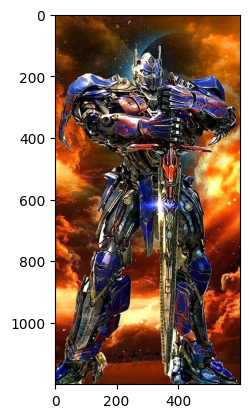

In [ ]:
# Convert to RGB
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

 ## $\hspace{157pt}$  **Harries Corner Detection**

### **Harris Corner Detection**

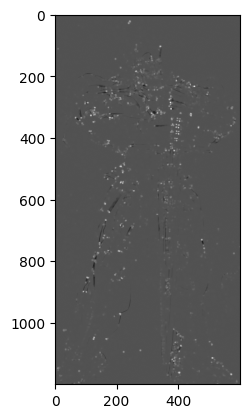

In [ ]:
# Corner Harris Detection
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4, 7, 0.08)
dst = cv2.dilate(dst, None)
plt.imshow(dst, cmap='gray')

- **Theory Note**:  
  - `cv2.cornerHarris()`: Applies the Harris corner detection algorithm.
    - **Parameters**:
      - `4`: The block size (the size of the neighborhood for corner detection).
      - `7`: The aperture size for the Sobel operator (used to calculate gradients).
      - `0.08`: The Harris detector free parameter.
  - `cv2.dilate()`: Enhances the detected corners for better visualization.

- **Explanation**:  
  We first convert the image to grayscale and apply Harris corner detection to detect corners in the image. The result is then dilated to make corners more visible.

### **Detect and Display Corners**

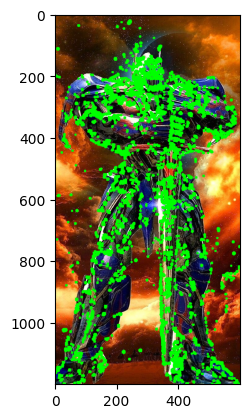

In [ ]:
# Threshold and display detected corners
thresh = 0.01 * dst.max()
corner_image = np.copy(image_copy)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 2)
plt.imshow(corner_image)

- **Theory Note**:  
  - `cv2.circle()`: Draws a circle at the detected corner locations.
  - **Thresholding**: Detects only significant corners by comparing `dst` values to a threshold.

- **Explanation**:  
  This cell identifies the corners from the Harris corner map and draws green circles on them to visualize the detected corners.

### **Rotate the Image**

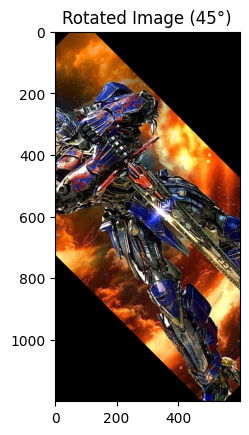

In [ ]:
# Rotate Image for Comparison
height, width = image.shape[:2]
angle = 45
rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title(f'Rotated Image ({angle}°)')
plt.show()

- **Theory Note**:  
  - `cv2.getRotationMatrix2D()`: Computes the rotation matrix to rotate the image around its center.
  - `cv2.warpAffine()`: Applies the affine transformation to rotate the image.
  - **Parameters**:
    - `angle`: The angle by which to rotate the image (45 degrees in this case).

- **Explanation**:  
  The image is rotated by 45 degrees using affine transformation, which helps us observe how corner detection performs after the image is transformed.

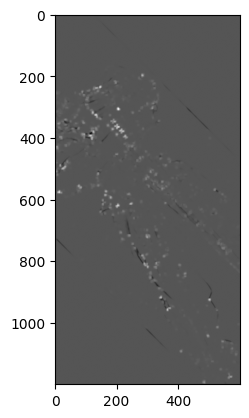

In [ ]:
# Apply Corner Harris to rotated image
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst_rotated = cv2.cornerHarris(gray, 8, 9, 0.08)
dst_rotated = cv2.dilate(dst_rotated, None)
plt.imshow(dst_rotated, cmap='gray')

- **Theory Note**:  
  - Same as the previous Harris corner detection but applied to the rotated image.
  - `cv2.cornerHarris()`: Applied again with adjusted parameters for the rotated image.

- **Explanation**:  
  Harris corner detection is applied to the rotated image to compare how corner locations change after the transformation.

### **Display Detected Corners on Rotated Image**

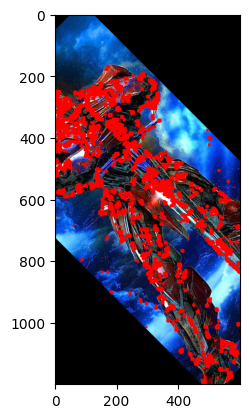

In [ ]:
# Threshold and display detected corners on rotated image
thresh = 0.01 * dst_rotated.max()
corner_image_rotated = np.copy(rotated_image)
for j in range(0, dst_rotated.shape[0]):
    for i in range(0, dst_rotated.shape[1]):
        if dst_rotated[j, i] > thresh:
            cv2.circle(corner_image_rotated, (i, j), 1, (255, 0, 0), 2)

plt.imshow(corner_image_rotated)

- **Theory Note**:  
  Similar to the previous corner detection, but for the rotated image. Detected corners are marked with red circles.

- **Explanation**:  
  Corners in the rotated image are marked with red circles, and they are compared with the original image's corners to observe how corner detection handles rotation.


### **Compare Original and Rotated Image**

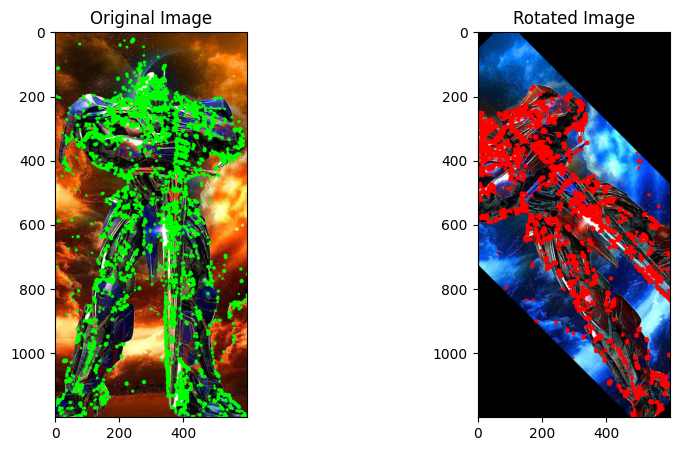

In [ ]:
# Compare original and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(corner_image)
plt.title("Original Image")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.imshow(corner_image_rotated)
plt.title("Rotated Image")
plt.axis("on")
plt.show()

- **Theory Note**:  
  - `plt.subplot()`: Used to create side-by-side plots for comparing the original and rotated images.

- **Explanation**:  
  This cell displays the original and rotated images side by side for a clear visual comparison of corner detection before and after rotation.


---

 ## $\hspace{157pt}$  **SIFT Detection**

### **SIFT Feature Detection**

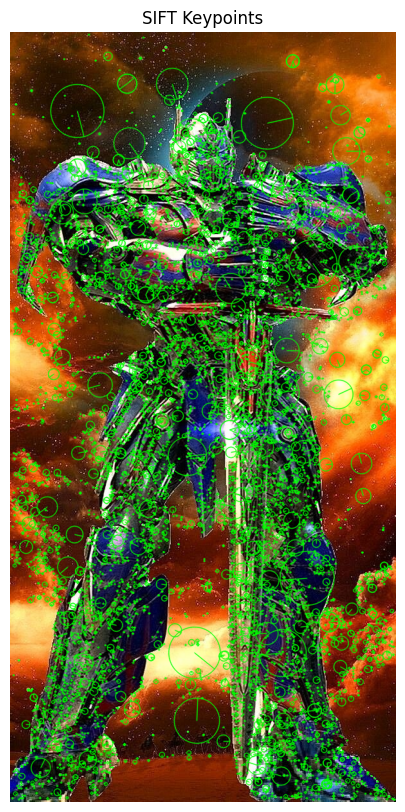

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Optimus.jpg'
image = cv2.imread(image_path)

# Check if image is loaded successfully
if image is None:
    print("Error: Unable to load image!")
else:
    # Convert image to RGB (OpenCV reads as BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert image to grayscale
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    # SIFT Feature Detection
    sift = cv2.SIFT_create()
    keypoints_sift = sift.detect(gray, None)

    # Draw the keypoints on the image
    sift_image = cv2.drawKeypoints(image_rgb, keypoints_sift, None, (0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Show the image with keypoints
    plt.figure(figsize=(10, 10))  # Make the image bigger
    plt.imshow(sift_image)
    plt.title("SIFT Keypoints")
    plt.axis("off")
    plt.show()

- **Theory Note**:  
  - `cv2.SIFT_create()`: Creates a SIFT detector.  
  - `detectAndCompute()`: Detects keypoints and computes descriptors for each keypoint in the image.
  
- **Explanation**:  
  We apply SIFT to detect distinctive keypoints that are invariant to scale and rotation. These points can be used for image matching and object recognition.

---

 ## $\hspace{160pt}$  **SURF Detection**

### **SURF Feature Detection**

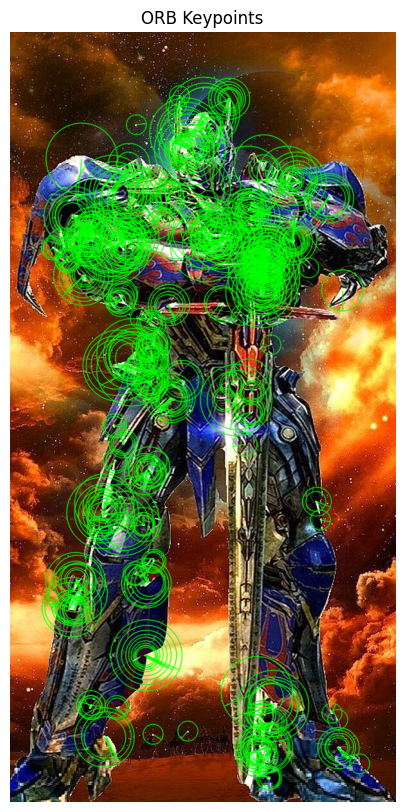

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image_path = 'Optimus.jpg'
image = cv2.imread(image_path)
# Check if image is loaded successfully
if image is None:
 print("Error: Unable to load image!")
else:
# Convert image to RGB (OpenCV reads as BGR by default)
 image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert image to grayscale
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# ORB Feature Detection (Fallback for SURF)
orb = cv2.ORB_create()
keypoints_orb = orb.detect(gray, None)
# Draw the keypoints on the image
orb_image = cv2.drawKeypoints(image_rgb, keypoints_orb, None, (0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show the image with keypoints
plt.figure(figsize=(10, 10)) # Make the image bigger
plt.imshow(orb_image)
plt.title("ORB Keypoints")
plt.axis("off")
plt.show()

- **Theory Note**:  
  - `cv2.xfeatures2d.SURF_create()`: Creates a SURF detector.
  - `detectAndCompute()`: Detects and computes keypoints and descriptors.

- **Explanation**:  
  SURF is a faster alternative to SIFT. We apply SURF to detect and describe keypoints that are scale and rotation invariant.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


### **Conclusion:**
- **Corner Harris**: The Harris corner detection method is effective in detecting corners in both original and rotated images. However, rotation can cause slight misalignment of corners in transformed images.
  
- **SIFT vs SURF**: SIFT is more accurate but slower, making it suitable for precise applications. SURF, while slightly less accurate, is faster and can be used in real-time scenarios. Both methods detect keypoints that are invariant to scale and rotation.

- **Comparison**: Harris corner detection is good for detecting corner points, while SIFT and SURF are better for identifying distinctive feature points. Depending on the application, either could be preferred based on the need for speed (SURF) or accuracy (SIFT).